In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy import stats as st
import statsmodels.api as sm

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#cd /content/gdrive/MyDrive/Colab Notebooks

In [3]:
m = pd.read_csv("measurements.csv")

In [4]:
m.columns

Index(['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

In [5]:
def varray(x):
  return x.to_numpy().reshape((-1,1))
def onesvarray(x):
  return np.column_stack((np.ones(len(x)), x.to_numpy().reshape((-1,1))))
def onesmatrix(x):
  return np.column_stack((np.ones(x.shape[0]), x.to_numpy()))

In [221]:
X = onesmatrix(m[['weight_init', 'height_init']])
y = varray(m.BMI_init)
X[:,2] = X[:,2]
#X = onesvarray(m.height_init)
#y = varray(m.armspan_init)
res = sm.OLS(y, X).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
print(res.summary())
print("Parameters: ", res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3432.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           5.45e-76
Time:                        02:05:26   Log-Likelihood:                -18.257
No. Observations:                  80   AIC:                             42.51
Df Residuals:                      77   BIC:                             49.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3793      0.709     76.665      0.0

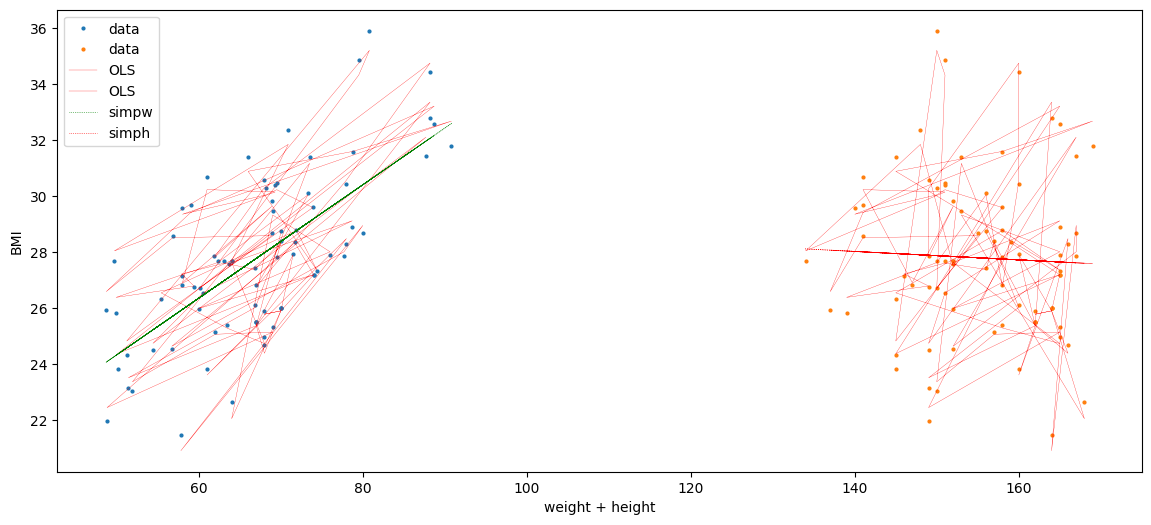

In [222]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(X[:,1:], y, "o", label="data", markersize=2, linewidth = 0.3)
ax.plot(X[:,1:], res.fittedvalues, "r-", label="OLS", markersize=0.1, linewidth = 0.2)
ax.plot(X[:,1], X[:,[0,1]] @ (np.linalg.pinv(X[:,[0,1]]) @ y), "g:", label="simpw", markersize=2, linewidth = 0.5)
ax.plot(X[:,2], X[:,[0,2]] @ (np.linalg.pinv(X[:,[0,2]]) @ y), "r:", label="simph", markersize=2, linewidth = 0.5)
#ax.plot(X[:,1:], iv_u, "r--", linewidth = 0.1)
#ax.plot(X[:,1:], iv_l, "r--", linewidth = 0.1)
ax.set_xlabel('weight + height')
ax.set_ylabel('BMI')
ax.legend(loc="best")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


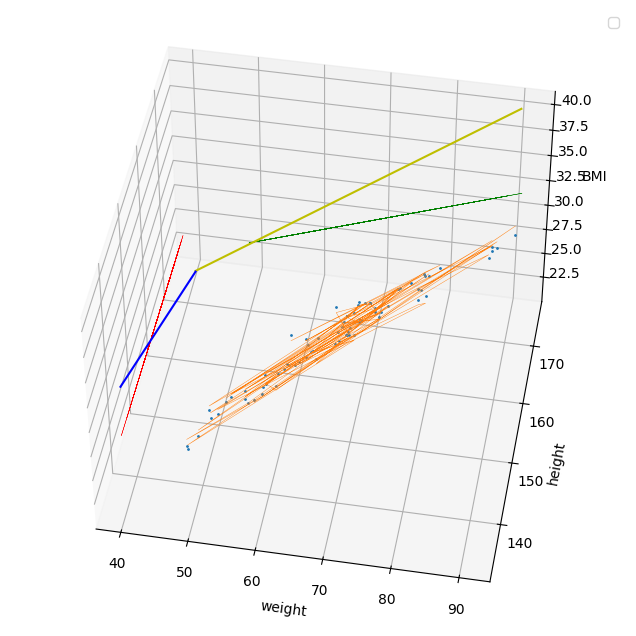

In [223]:
ax = plt.figure(figsize=(14, 8)).add_subplot(projection='3d')
ax.view_init(45, 280)
ax.plot(X[:,1], X[:,2], y.reshape((-1)), 'o', markersize = 1, linewidth = 0.3)
ax.plot(X[:,1], X[:,2], res.fittedvalues.reshape((-1)), '-', markersize=3, linewidth = 0.3)
ax.plot(X[:,1], np.ones(80)*175, (X[:,[0,1]] @ (np.linalg.pinv(X[:,[0,1]]) @ y)).reshape((-1)), 'g-', markersize=3, linewidth = 0.3)
ax.plot(np.ones(80)*40, X[:,2], (X[:,[0,2]] @ (np.linalg.pinv(X[:,[0,2]]) @ y)).reshape((-1)), 'r-', markersize=3, linewidth = 0.3)
ax.plot(np.linspace(40,90,80), np.ones(80)*175, 4+np.linspace(40,90,80)*0.40929958, 'y-')
ax.plot(np.ones(80)*40, np.linspace(135,175,80), 79.5+np.linspace(135,170,80)*(-0.34827194), 'b-')
ax.set_xlabel('weight')
ax.set_ylabel('height')
ax.set_zlabel('BMI')
ax.legend()
plt.show()

In [228]:
10000 * X[:,1] / (X[:,2] **2)

array([27.84008973, 28.398718  , 27.44904668, 27.67422481, 27.16269469,
       26.75555155, 25.82682056, 27.68888889, 30.11998685, 26.83864765,
       30.4296875 , 34.453125  , 30.58420792, 27.88162695, 29.8216759 ,
       26.84066824, 30.68256124, 30.3934038 , 27.67877033, 32.36851717,
       27.57098338, 32.58034894, 29.67657562, 25.94704033, 28.56999145,
       28.67845994, 24.35196195, 35.91111111, 34.8668918 , 26.71111111,
       29.60262778, 30.48111925, 30.31111111, 29.59183673, 31.79160394,
       31.56545425, 31.39120095, 27.32782369, 28.80147412, 26.34958383,
       25.39657106, 24.97704316, 27.70083102, 23.82877527, 27.18089991,
       28.36121989, 21.98099185, 25.34435262, 25.15315023, 23.06666667,
       31.39818019, 26.1328125 , 23.15211027, 25.52964487, 32.79298037,
       27.70083102, 28.90725436, 26.53392395, 24.50340075, 31.44608986,
       24.54120499, 27.86044677, 28.68514468, 21.49018441, 28.30599506,
       23.828125  , 25.52964487, 27.9296875 , 26.0261749 , 25.91